In [1]:
import torch
import numpy as np
import torch.nn as nn
from torch.optim import SGD
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import time

In [2]:
torch.cuda.is_available()

True

In [3]:
print(torch.version.cuda)

12.1


In [4]:
# Tensors
S0 = torch.tensor(1) # Zero dimensional tensor
S1 = torch.tensor([1, 2, 3, 4]) # One dimensional tensor
S2 = torch.tensor([[1, 2], 
                   [3, 4]]) # Two dimensional tensor
S3 = torch.tensor([[[1, 2], 
                    [3, 4]], 
                   [[5, 6], 
                    [7, 8]]]) # Three dimensional tensor

In [5]:
print(S0.shape, S1.shape, S2.shape, S3.shape)

torch.Size([]) torch.Size([4]) torch.Size([2, 2]) torch.Size([2, 2, 2])


In [6]:
print(S0.dtype, S1.dtype, S2.dtype, S3.dtype)

torch.int64 torch.int64 torch.int64 torch.int64


In [7]:
print(S0.ndim, S1.ndim, S2.ndim, S3.ndim)

0 1 2 3


In [8]:
S = torch.tensor([False, 2, 7.0])

In [9]:
S

tensor([0., 2., 7.])

In [10]:
torch.zeros((2, 3))

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [11]:
torch.ones((2, 3))

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [12]:
torch.randint(low=0, high=10, size=(2, 3))

tensor([[2, 1, 7],
        [7, 3, 9]])

In [13]:
torch.rand((2, 3))

tensor([[0.4405, 0.4793, 0.9322],
        [0.0411, 0.0600, 0.3135]])

In [14]:
torch.randn((2, 3))

tensor([[ 0.2128,  0.2290, -0.1673],
        [ 0.4728, -0.0713, -0.1024]])

In [15]:
S_npy = np.array([[1, 2, 3],
                 [4, 5, 6]])
S_pth = torch.tensor(S_npy)

In [16]:
print(type(S_npy), type(S_pth))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


In [17]:
S = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])
print(S*10)

tensor([[10, 20, 30],
        [40, 50, 60]])


In [18]:
y = S.add(10)
print(y)

tensor([[11, 12, 13],
        [14, 15, 16]])


In [19]:
S  = torch.tensor([1, 2, 3])
print(S.shape)
S = S.view(3, 1)
print(S)

torch.Size([3])
tensor([[1],
        [2],
        [3]])


In [20]:
S = torch.randn(4, 1, 3)
S_sq_1 = torch.squeeze(S, 1)
S_sq_2 = S.squeeze(1)
assert torch.all(S_sq_1 == S_sq_2)
print("Squeeze:\n", S.shape, S_sq_1.shape)
print(S, S_sq_1)


Squeeze:
 torch.Size([4, 1, 3]) torch.Size([4, 3])
tensor([[[ 0.4436,  1.2476,  0.1401]],

        [[-1.6111,  3.0905,  0.2835]],

        [[-1.2981,  2.0361, -0.7476]],

        [[ 0.9557,  1.4014,  0.9734]]]) tensor([[ 0.4436,  1.2476,  0.1401],
        [-1.6111,  3.0905,  0.2835],
        [-1.2981,  2.0361, -0.7476],
        [ 0.9557,  1.4014,  0.9734]])


In [21]:
S = torch.randn(4, 3)
print(S.shape)
z1 = S.unsqueeze(0)
print(z1.shape)

torch.Size([4, 3])
torch.Size([1, 4, 3])


In [22]:
S = torch.randn(3, 4)
z2, z3, z4 = S[None], S[:, None], S[:, :, None]
print(S.shape, z2.shape, z3.shape, z4.shape)

torch.Size([3, 4]) torch.Size([1, 3, 4]) torch.Size([3, 1, 4]) torch.Size([3, 4, 1])


In [23]:
# Matrix multiplication
S = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])
y = torch.tensor([[7, 8],
                  [9, 10],
                  [11, 12]])
print(torch.matmul(S, y))

tensor([[ 58,  64],
        [139, 154]])


In [24]:
print(S @ y)

tensor([[ 58,  64],
        [139, 154]])


In [25]:
S = torch.randn(2, 2, 2)
C1 = torch.cat([S, S], axis=0)
print(S, C1)

tensor([[[-9.4173e-01,  6.2252e-01],
         [-5.7188e-01, -1.4950e-03]],

        [[-2.1180e+00,  2.0362e-01],
         [-2.6490e-01,  7.4558e-01]]]) tensor([[[-9.4173e-01,  6.2252e-01],
         [-5.7188e-01, -1.4950e-03]],

        [[-2.1180e+00,  2.0362e-01],
         [-2.6490e-01,  7.4558e-01]],

        [[-9.4173e-01,  6.2252e-01],
         [-5.7188e-01, -1.4950e-03]],

        [[-2.1180e+00,  2.0362e-01],
         [-2.6490e-01,  7.4558e-01]]])


In [26]:
C2 = torch.cat([S, S], axis=1)
print(S.shape, C2.shape)

torch.Size([2, 2, 2]) torch.Size([2, 4, 2])


In [27]:
S = torch.arange(25).reshape(5, 5)
print(S)

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])


In [28]:
S.max()

tensor(24)

In [29]:
S.max(dim=0)

torch.return_types.max(
values=tensor([20, 21, 22, 23, 24]),
indices=tensor([4, 4, 4, 4, 4]))

In [30]:
m, argm = S.max(dim=1)
print(m, argm)

tensor([ 4,  9, 14, 19, 24]) tensor([4, 4, 4, 4, 4])


In [31]:
S = torch.randn(10, 20, 30)
z = S.permute(2, 0 , 1)
print(S.shape, z.shape)

torch.Size([10, 20, 30]) torch.Size([30, 10, 20])


In [32]:
S = torch.tensor([[2., -1.],
                  [1., 1.]], requires_grad=True)

In [33]:
print(S)

tensor([[ 2., -1.],
        [ 1.,  1.]], requires_grad=True)


In [34]:
out = S.pow(2).sum()

In [35]:
out.backward()

In [36]:
S.grad

tensor([[ 4., -2.],
        [ 2.,  2.]])

In [37]:
# Comparing the speed of cpu vs gpu when using PyTorch
S = torch.rand(1, 6400)
y = torch.rand(6400, 5000)

In [38]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [39]:
S, y = S.to(device), y.to(device)

In [40]:
%timeit z=(S@y)

557 μs ± 3.85 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [41]:
S, y = S.cpu(), y.cpu()

In [42]:
%timeit z=(S@y)

7.18 ms ± 448 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [43]:
S = np.random.random((1, 6400))
y = np.random.random((6400, 5000))

In [44]:
%timeit z=(S@y)

8.25 ms ± 199 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### A simple neural net using PyTorch

In [45]:
# Input and Output values
S = [[1,2], [3, 4], [5, 6], [7, 8]]
y = [[3], [7], [11], [15]]
S = torch.tensor(S).float()
y = torch.tensor(y).float()

In [46]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [47]:
S = S.to(device)
y = y.to(device)

In [48]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8, 1)

    def forward(self, S):
        S = self.input_to_hidden_layer(S)
        S = self.hidden_layer_activation(S)
        S = self.hidden_to_output_layer(S)
        return S

In [49]:
SNet = NeuralNet().to(device)

In [50]:
SNet.input_to_hidden_layer.weight, SNet.parameters

(Parameter containing:
 tensor([[-0.6323, -0.3286],
         [-0.2465,  0.3543],
         [-0.2539, -0.3938],
         [-0.4934,  0.6257],
         [ 0.4958,  0.0590],
         [ 0.6419, -0.3058],
         [-0.6251,  0.0131],
         [ 0.5973, -0.1627]], device='cuda:0', requires_grad=True),
 <bound method Module.parameters of NeuralNet(
   (input_to_hidden_layer): Linear(in_features=2, out_features=8, bias=True)
   (hidden_layer_activation): ReLU()
   (hidden_to_output_layer): Linear(in_features=8, out_features=1, bias=True)
 )>)

In [51]:
for par in SNet.parameters():
    print(par)

Parameter containing:
tensor([[-0.6323, -0.3286],
        [-0.2465,  0.3543],
        [-0.2539, -0.3938],
        [-0.4934,  0.6257],
        [ 0.4958,  0.0590],
        [ 0.6419, -0.3058],
        [-0.6251,  0.0131],
        [ 0.5973, -0.1627]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([ 0.1133, -0.1119,  0.1233, -0.1911,  0.3264, -0.6308,  0.5408, -0.1664],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.0706,  0.0734,  0.2362,  0.0972,  0.2772,  0.1912, -0.2140,  0.2100]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([0.3071], device='cuda:0', requires_grad=True)


In [52]:
# Loss function, mean squared error
loss_fn = nn.MSELoss()

In [53]:
# Computing the loss value before training
_y = SNet(S)
print(loss_fn(_y, y))

tensor(69.3700, device='cuda:0', grad_fn=<MseLossBackward0>)


In [54]:
# Optimizer - Stochastic gradient descent
opt = SGD(SNet.parameters(), lr=0.001)

In [55]:
# Training the neural net
loss_history = []
for _ in range(100):
    opt.zero_grad()
    loss_value = loss_fn(SNet(S), y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

In [56]:
loss_history

[69.37004089355469,
 62.84416198730469,
 55.616119384765625,
 47.84701919555664,
 39.812679290771484,
 31.883155822753906,
 24.468332290649414,
 17.938282012939453,
 12.543920516967773,
 8.370494842529297,
 5.342918872833252,
 3.2755417823791504,
 1.9387726783752441,
 1.1142867803573608,
 0.6254384517669678,
 0.34470295906066895,
 0.1874885857105255,
 0.1011403426527977,
 0.054407183080911636,
 0.029390379786491394,
 0.016106318682432175,
 0.009094112552702427,
 0.005406990181654692,
 0.0034736450761556625,
 0.002461005002260208,
 0.0019302824512124062,
 0.0016512797446921468,
 0.00150355976074934,
 0.0014242607867345214,
 0.0013805576600134373,
 0.0013553451281040907,
 0.0013398107839748263,
 0.0013293047668412328,
 0.0013213710626587272,
 0.001314849010668695,
 0.0013090124120935798,
 0.001303592580370605,
 0.0012983279302716255,
 0.001293239532969892,
 0.0012882151640951633,
 0.0012832089560106397,
 0.0012782460544258356,
 0.0012733215698972344,
 0.0012683970853686333,
 0.0012635007

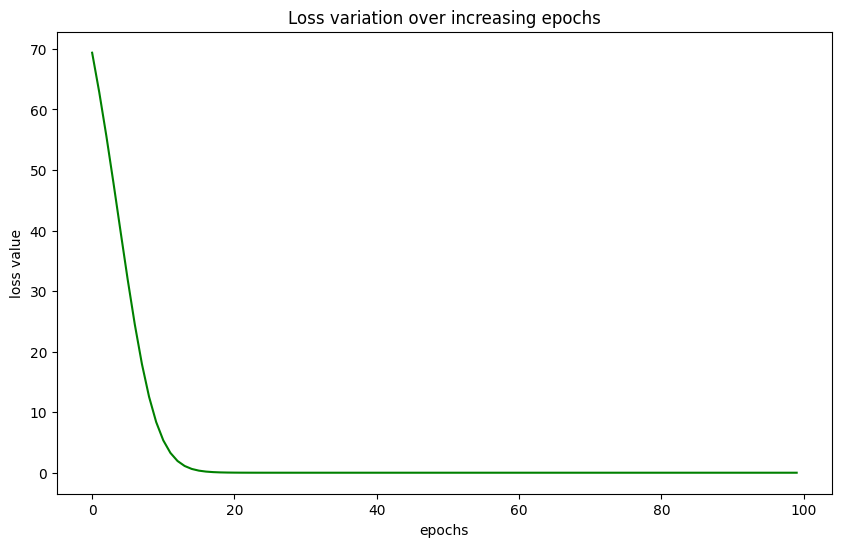

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history, color="green")
plt.title("Loss variation over increasing epochs")
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.show()

In [58]:
# Predicting the output using the trained neural net
for input, output in zip(S, y):
    print(f"Output: {output.item()} Predicted Output: {SNet(input).item()}")

Output: 3.0 Predicted Output: 3.055568218231201
Output: 7.0 Predicted Output: 7.022704124450684
Output: 11.0 Predicted Output: 11.000551223754883
Output: 15.0 Predicted Output: 14.978399276733398


In [59]:
SNet(torch.tensor((6,9)).float().to(device))

tensor([14.3579], device='cuda:0', grad_fn=<ViewBackward0>)

### Training in batches

In [60]:
# Input and Output values
S = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [[3], [7], [11], [15]]

In [61]:
S = torch.tensor(S).float()
y = torch.tensor(y).float()

In [62]:
device

'cuda'

In [63]:
S = S.to(device)
y = y.to(device)

In [64]:
class Dataset(Dataset):
    def __init__(self, S, y):
        self.S = torch.tensor(S).float()
        self.y = torch.tensor(y).float()
    def __len__(self):
        return len(self.S)
    def __getitem__(self, iS):
        return self.S[iS], self.y[iS]

In [65]:
ds = Dataset(S, y)

C:\Users\SANDIP\AppData\Local\Temp\ipykernel_8408\4047412261.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.S = torch.tensor(S).float()
C:\Users\SANDIP\AppData\Local\Temp\ipykernel_8408\4047412261.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y).float()


In [66]:
dl = DataLoader(ds, batch_size=2, shuffle=True)

In [67]:
for S, y in dl:
    print(S, y)

tensor([[5., 6.],
        [1., 2.]], device='cuda:0') tensor([[11.],
        [ 3.]], device='cuda:0')
tensor([[7., 8.],
        [3., 4.]], device='cuda:0') tensor([[15.],
        [ 7.]], device='cuda:0')


In [68]:
class NeuralNet1(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8, 1)
    def forward(self, S):
        S = self.input_to_hidden_layer(S)
        S = self.hidden_layer_activation(S)
        S = self.hidden_to_output_layer(S)
        return S

In [69]:
SNet1 = NeuralNet1().to(device)
loss_fn = nn.MSELoss()
opt = SGD(SNet1.parameters(), lr=0.001)

In [70]:
# Training the neural net
loss_history = []
start = time.time()
for _ in range(100):
    for data in dl:
        S, y = data
        opt.zero_grad()
        loss_value = loss_fn(SNet1(S), y)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value.item())
end = time.time()
print(end - start)

0.15651822090148926


In [71]:
loss_history

[205.1042022705078,
 17.18320083618164,
 30.81232261657715,
 45.832210540771484,
 14.53670883178711,
 11.04357624053955,
 3.48210072517395,
 3.8431649208068848,
 1.3447091579437256,
 0.47411495447158813,
 0.3090199828147888,
 0.18009652197360992,
 0.026414938271045685,
 0.21954411268234253,
 0.15201103687286377,
 0.05497535690665245,
 0.039406437426805496,
 0.16395166516304016,
 0.03992418572306633,
 0.16242307424545288,
 0.058465875685214996,
 0.13834568858146667,
 0.16577354073524475,
 0.04873644560575485,
 0.13574953377246857,
 0.06073405593633652,
 0.04039466753602028,
 0.1576487272977829,
 0.05686579644680023,
 0.13541366159915924,
 0.0590541772544384,
 0.13233569264411926,
 0.060106344521045685,
 0.13066110014915466,
 0.12443246692419052,
 0.06579265743494034,
 0.16112972795963287,
 0.044039737433195114,
 0.13076704740524292,
 0.05802077800035477,
 0.03899497166275978,
 0.15118063986301422,
 0.1271378993988037,
 0.05875254049897194,
 0.0374954491853714,
 0.15015412867069244,
 0.1

In [72]:
for input, output in zip(S, y):
    print(f"Input: {input} Output: {output.item()} Predicted Output: {SNet1(input).item()}")

Input: tensor([1., 2.], device='cuda:0') Output: 3.0 Predicted Output: 2.602985382080078
Input: tensor([7., 8.], device='cuda:0') Output: 15.0 Predicted Output: 15.164240837097168


In [73]:
S_ = [[9, 14]]
S_ = torch.tensor(S_).float().to(device)

In [74]:
SNet1(S_).item()

23.84184455871582

### Custom loss function

In [75]:
def mean_squared_error(y_, y):
    """Function to compute the mse loss function 
       y_ -> Predicted Output
       y  -> True Output
    """
    loss = (y_ - y)**2
    loss = loss.mean()
    return loss

In [76]:
mean_squared_error(SNet1(S), y)

tensor(0.0923, device='cuda:0', grad_fn=<MeanBackward0>)

### Fetching values of the Intermediate layers

In [77]:
# Creating input and output tensors
S = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [[3], [7], [11], [15]]
S = torch.tensor(S).float()
y = torch.tensor(y).float()

In [78]:
print(device)

cuda


In [79]:
S = S.to(device)
y = y.to(device)

In [80]:
class NeuralNet2(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8, 1)
    def forward(self, S):
        S = self.input_to_hidden_layer(S)
        S = self.hidden_layer_activation(S)
        S = self.hidden_to_output_layer(S)
        return S

In [81]:
SNet2 = NeuralNet2().to(device)

In [82]:
loss_fn = nn.MSELoss()

In [83]:
y_ = SNet2(S)
print(loss_fn(y_, y))

tensor(174.2070, device='cuda:0', grad_fn=<MseLossBackward0>)


In [84]:
opt = SGD(SNet2.parameters(), lr=0.001)

In [85]:
# Training the neural net
loss_history = []
for _ in range(100):
    opt.zero_grad()
    loss_value = loss_fn(SNet2(S), y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

In [86]:
loss_history

[174.2069549560547,
 112.77606201171875,
 76.83944702148438,
 52.154972076416016,
 34.297019958496094,
 21.520122528076172,
 12.809086799621582,
 7.3146653175354,
 3.9850711822509766,
 2.083468437194824,
 1.055672526359558,
 0.5244715213775635,
 0.25926274061203003,
 0.1302158087491989,
 0.06857603043317795,
 0.03951261192560196,
 0.025926493108272552,
 0.019606802612543106,
 0.016671113669872284,
 0.015301968902349472,
 0.01465580239892006,
 0.01434213388711214,
 0.014181247912347317,
 0.01409057155251503,
 0.014031954109668732,
 0.013988055288791656,
 0.013950914144515991,
 0.013917075470089912,
 0.013884669169783592,
 0.01385288592427969,
 0.013821587897837162,
 0.01379037369042635,
 0.013759435154497623,
 0.013728481717407703,
 0.013697652146220207,
 0.013666944578289986,
 0.013636252842843533,
 0.013605602085590363,
 0.01357493456453085,
 0.013544496148824692,
 0.013514107093214989,
 0.013483721762895584,
 0.013453387655317783,
 0.013423234224319458,
 0.013393048197031021,
 0.0133

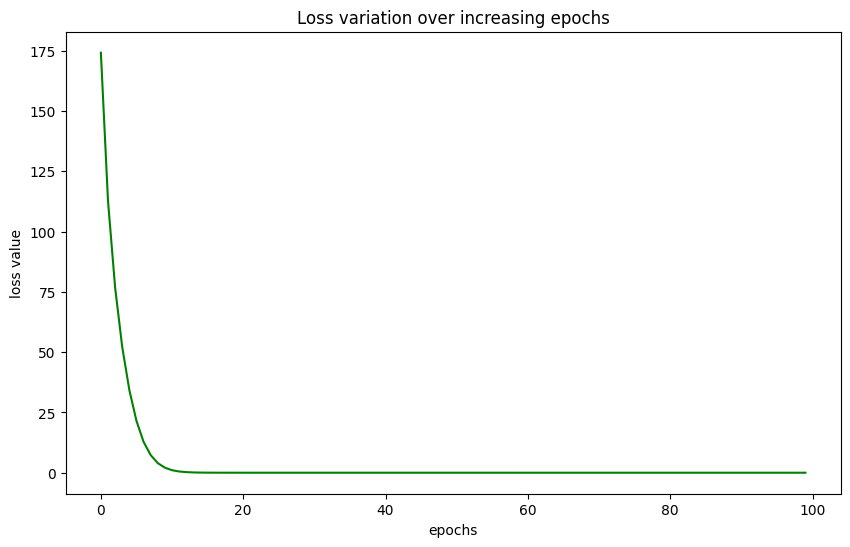

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history, color="green")
plt.title("Loss variation over increasing epochs")
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.show()

In [88]:
# Fetching intermediate values by directly calling the intermediate layer
input_to_hidden = SNet2.input_to_hidden_layer(S)
hidden_activation = SNet2.hidden_layer_activation(input_to_hidden)
print(hidden_activation)

tensor([[ 1.1181,  0.0000,  0.0000,  2.2297,  0.7140,  1.3933,  0.0000,  1.4384],
        [ 2.0654,  0.0000,  0.0000,  5.3353,  1.0548,  3.2006,  0.0000,  3.0978],
        [ 3.0128,  0.0000,  0.0000,  8.4408,  1.3956,  5.0080,  0.0000,  4.7572],
        [ 3.9602,  0.0000,  0.0000, 11.5464,  1.7363,  6.8153,  0.0000,  6.4166]],
       device='cuda:0', grad_fn=<ReluBackward0>)


### Fetching intermediate values by returning them in nn.Module definition

In [89]:
# Creating input and output tensors
S = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [[3], [7], [11], [15]]
S = torch.tensor(S).float()
y = torch.tensor(y).float()

In [90]:
device

'cuda'

In [91]:
S = S.to(device)
y = y.to(device)

In [92]:
class NeuralNet3(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8, 1)
    def forward(self, S):
        hidden1 = self.input_to_hidden_layer(S)
        hidden2 = self.hidden_layer_activation(hidden1)
        S = self.hidden_to_output_layer(hidden2)
        return S, hidden1


In [93]:
SNet3 = NeuralNet3().to(device)
loss_fn = nn.MSELoss()

In [94]:
y_, y_hidden = SNet3(S)
print(loss_fn(y_, y))

tensor(111.3085, device='cuda:0', grad_fn=<MseLossBackward0>)


In [95]:
opt = SGD(SNet3.parameters(), lr=0.001)

In [96]:
loss_history = []
for _ in range(100):
    opt.zero_grad()
    loss_value = loss_fn(SNet3(S)[0], y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

In [97]:
loss_history

[111.30845642089844,
 98.71185302734375,
 87.57980346679688,
 76.96890258789062,
 66.42707824707031,
 55.84857940673828,
 45.399288177490234,
 35.44084167480469,
 26.42229461669922,
 18.74579429626465,
 12.646235466003418,
 8.134072303771973,
 5.022086143493652,
 3.0110268592834473,
 1.784034252166748,
 1.0708497762680054,
 0.6722503304481506,
 0.4561423063278198,
 0.34158170223236084,
 0.2817726731300354,
 0.250802606344223,
 0.23476538062095642,
 0.22636492550373077,
 0.22183522582054138,
 0.21925663948059082,
 0.21765653789043427,
 0.2165464460849762,
 0.21568159759044647,
 0.2149394303560257,
 0.214259535074234,
 0.21361148357391357,
 0.21298015117645264,
 0.21235734224319458,
 0.21174125373363495,
 0.21112847328186035,
 0.21051791310310364,
 0.20991018414497375,
 0.2093043029308319,
 0.20870105922222137,
 0.20809908211231232,
 0.2074989229440689,
 0.20690080523490906,
 0.20630478858947754,
 0.20571038126945496,
 0.20511794090270996,
 0.20452715456485748,
 0.20393814146518707,
 0.2

In [98]:
SNet3(S)[1]

tensor([[-0.3520, -0.9110,  0.1098, -0.4765,  1.6413,  1.9194, -0.8951,  2.3999],
        [-0.8413, -2.9574, -0.2518, -0.8618,  3.6611,  3.0154, -0.7575,  4.7848],
        [-1.3305, -5.0039, -0.6134, -1.2472,  5.6809,  4.1114, -0.6199,  7.1696],
        [-1.8198, -7.0504, -0.9750, -1.6326,  7.7007,  5.2074, -0.4823,  9.5544]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

### Sequential method to build a neural network

In [99]:
# Input and Output values
S = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [[3], [7], [11], [15]]

In [100]:
print(device)

cuda


In [101]:
class MyDataset(Dataset):
    """
    torch.utils.data.Dataset stores the samples and their corresponding labels.
    """
    def __init__(self, S, y):
        self.S = torch.tensor(S).float().to(device)
        self.y = torch.tensor(y).float().to(device)
    def __getitem__(self, iS):
        """
        The __getitem__ function loads and returns 
        a sample from the dataset at the given index iS.
        """
        return self.S[iS], self.y[iS]
    def __len__(self):
        return len(self.S)

In [102]:
ds = MyDataset(S, y)

In [103]:
# torch.utils.data.DataLoader wraps an iterable around the Dataset to enable easy access to the samples.
dl = DataLoader(ds, batch_size=2, shuffle=True)

In [104]:
SNet4 = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)

In [105]:
print(SNet4)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


In [106]:
loss_fn = nn.MSELoss() # Loss function mean squared error
opt = SGD(SNet4.parameters(), lr=0.001) # Optmizer -> stochastic gradient descent


In [107]:
# Training the neuralnet for 100 epochs
loss_history = []
start = time.time()
for _ in range(100):
    for iS, iy in dl:
        opt.zero_grad()
        loss_value = loss_fn(SNet4(iS), iy)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value.item())
end = time.time()
print(end - start)


0.15595030784606934


In [108]:
# Loss value after the 100th epoch
loss_history[199]

0.0652865469455719

In [109]:
# Testing the network on values outside of the training data
input_val = [[10, 11], [4.5, 5.5], [17, 18]]
input_val = torch.tensor(input_val).float().to(device)
output_val = [[21], [10], [35]]
output_val = torch.tensor(output_val).float().to(device)

In [110]:
input_val, output_val

(tensor([[10.0000, 11.0000],
         [ 4.5000,  5.5000],
         [17.0000, 18.0000]], device='cuda:0'),
 tensor([[21.],
         [10.],
         [35.]], device='cuda:0'))

In [111]:
for input, ouput in zip(input_val, output_val):
    print(f"Original Output: {ouput.item()} Predicted Output: {SNet4(input).item()}")

Original Output: 21.0 Predicted Output: 20.627979278564453
Original Output: 10.0 Predicted Output: 10.04130744934082
Original Output: 35.0 Predicted Output: 34.10192108154297


In [112]:
# Weight and Bias values of the neural net after training
SNet4.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1665, -0.5700],
                      [ 0.1687, -0.5491],
                      [-0.2439,  0.9342],
                      [ 0.7378,  0.6382],
                      [ 0.5669,  0.1634],
                      [-0.4053,  0.1543],
                      [-0.3363,  0.7489],
                      [-0.1591, -0.4886]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6602,  0.2172,  0.1419, -0.6243, -0.3379, -0.4985,  0.1603, -0.5184],
                     device='cuda:0')),
             ('2.weight',
              tensor([[ 0.0054, -0.1861,  0.6177,  0.8311,  0.2325,  0.0503,  0.4486,  0.0890]],
                     device='cuda:0')),
             ('2.bias', tensor([0.3360], device='cuda:0'))])